In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("./data_wrangled/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."


In [5]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific.tail(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
468,US000274,Whitworth College,내가 다녀온 교환대학은 Washington State 에 위치한 Whitworth ...,Whitworth College는 Seattle에서 비행기로 40분 정도 떨어져 있...,나는 Whitworth College에서 기숙사에 살았다. ISEP으로 가게 되면 ...,내가 미국에 가기 전에 가장 두려워했던 것은 바로 수업이었다. 어학연수와는 달리 교...,이 학교에서 내가 마음 편하게 지낼 수 있었던 것은 국제교육부 스텝들이 너무 따뜻하...,"기타 학교의 부대 시설로는 fitness center, music hall, soc...",NaN,NaN,처음에 Whitworth College를 ISEP으로부터 배정 받았을 때 현실적으로...
469,US000278,Wittenberg University,Wittenberg는 Ohio주의 작은 도시 Springfield에 위치해 있다. ...,"Springfield의 downtown에는 우체국, 은행(huntington) 정도...","1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다...",도서관은 Thomas library가 main이고 다른 단과대학 건물에 독서실이 있...,"국제교류부는 Hollenbeck 건물 1층에 있는데, Joann 과 Betsy 두 ...",Wittenberg의 가장 큰 장점. nWittenberg는 학비가 무척 비싼 학교...,"한국에서는 흔치 않은 gay, lesbian, transgender 등을 만날 수 ...",Wittenberg는 국제학생들에게 host family를 붙여준다. 비록 같이 살...,이처럼 wittenberg는 시골에 있는 작은 학교지만 지리적인 위치로 인한 단점보...


In [6]:
print(df_specific.columns)
print(df_specific.shape)

Index(['대학코드', '대학명', 'gen_info', 'env_info', 'food_info', 'study_info',
       'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info'],
      dtype='object')
(470, 11)


In [7]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [8]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "")
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # print(str_data) makes an error. too much of data
    # 한글, english 빼고 전부 날리기
    # str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.,]', ' ', str_data)

    # 한글 빼고 다 날리기
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ]', ' ', str_data)

    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split())
    return str_data

In [9]:
# accessing university info of given column (= accessing one cell)
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info

In [10]:
column_data = "gen_info"
univ_code = "DK000003"
str_example = access_univ_info(df_specific, column_data, univ_code)
str_example[:100]

'코펜하겐 대학교는 자연과학캠퍼스 인문캠퍼스 등 코펜하겐 시내 곳곳에 흩어져 있습니다 저는 조경건축 수업을 듣기 위해 에 위치한 자연과학 캠퍼스도 다니고 덴마크어 수업과 미디어커뮤니'

In [11]:
# collecting all column values into one string
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [12]:
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
corpus[:100]

글자수: 3985044


'아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되'

In [13]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [14]:
# count how many letters are tehre for each combined columns
for info in info_list:
    corpus_sample = column_to_string(df_specific, info)
    print(info, len(corpus_sample))

gen_info 3985044
env_info 3316342
food_info 4212609
study_info 3970047
office_info 2022400
facil_info 2832921
mhct_info 2307935
help_info 1582255
etc_info 2521724


## Tokenizing Sample Corpus

In [15]:
stopwords = []

In [16]:
# https://github.com/lovit/soynlp
from soynlp.tokenizer import RegexTokenizer, LTokenizer

tokenizer = LTokenizer()
tokenizer

In [17]:
column_data = "env_info"
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
print(corpus[:100])

글자수: 3316342
대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다 낮에는 대체적으로 사람들이 많이 다니므로 위험하지


In [18]:
# corpus is info column converted into one string
tokenized_corpus = tokenizer.tokenize(corpus)
print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")
print(tokenized_corpus[:10])

number of tokenized words in a corpus are: 849199
['대학교가', '도시', '여러곳에', '분포하고', '있으므로', '각기', '다르다', '하지만', '남녀를', '불문하고']


In [19]:
from collections import Counter

In [20]:
tokenized_corpus_counted = Counter(tokenized_corpus)
print("number of counted words:", len(tokenized_corpus_counted))
common_words = tokenized_corpus_counted.most_common(300)
print(common_words)

number of counted words: 90231
[('수', 14856), ('있습니다', 12950), ('있는', 9087), ('학교', 7678), ('있고', 5146), ('때문에', 4994), ('분', 4895), ('있다', 4673), ('이', 4366), ('많이', 3986), ('큰', 3600), ('타고', 3595), ('있는데', 3354), ('갈', 3238), ('있어서', 3175), ('라는', 3064), ('그', 3016), ('가', 2890), ('버스를', 2778), ('정도', 2654), ('그리고', 2640), ('캠퍼스', 2553), ('바로', 2448), ('등', 2441), ('에', 2427), ('는', 2421), ('하지만', 2419), ('학교에서', 2394), ('있어', 2384), ('대학', 2379), ('매우', 2370), ('같은', 2368), ('것', 2332), ('할', 2302), ('등이', 2247), ('작은', 2159), ('가장', 2121), ('정말', 2058), ('거리에', 2052), ('주변에', 1993), ('를', 1987), ('한', 1980), ('많은', 1958), ('더', 1934), ('다', 1911), ('가면', 1899), ('잘', 1821), ('걸어서', 1755), ('자주', 1749), ('거의', 1744), ('다른', 1717), ('것이', 1712), ('좋은', 1710), ('에서', 1702), ('또한', 1694), ('주로', 1658), ('주변에는', 1623), ('저는', 1575), ('볼', 1513), ('때', 1497), ('합니다', 1494), ('와', 1485), ('조금', 1467), ('근처에', 1464), ('학생들이', 1464), ('있기', 1441), ('없습니다', 1427), ('위치해', 1392), ('가까운', 138

In [21]:
common_words_list, frequency_list = map(list, zip(*common_words))
print(common_words_list[:10])

['수', '있습니다', '있는', '학교', '있고', '때문에', '분', '있다', '이', '많이']


In [22]:
# removing possible significant words from common words
def filter_stopwords():
    stopwords_candidates = []

    for info in info_list:
        # info column series
        df_info = df_specific[info].fillna("")
        print(df_info.shape)
        
        # info column converted into one string
        corpus = column_to_string(df_specific, info)
        tokenized_corpus = tokenizer.tokenize(corpus)
        print(tokenized_corpus[:10])
        print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")

        tokenized_corpus_counted = Counter(tokenized_corpus)
        print("number of counted words:", len(tokenized_corpus_counted))

        common_words = tokenized_corpus_counted.most_common(300)
        common_words_list, frequency_list = map(list, zip(*common_words))
        print(common_words_list[:10])    

        stopwords_candidates += common_words_list
        print(len(stopwords_candidates))

        for i in stopwords_candidates:
            if df_info.str.contains(i).sum() < 120:
                print(f"{i} word not appear in less than 1/4 of universities")
                stopwords_candidates.remove(i)
        
        print(len(stopwords_candidates))
        print(f"{random.sample(stopwords_candidates,10)} are random stopwords candidates")
        
        stopwords = stopwords_candidates
        
        with open("file.txt", "wt", encoding="UTF8") as output:
            output.write(stopwords)

In [23]:
stopwords_file = open('stopwords_kr.txt','rt', encoding='UTF8')
stopwords_txt = stopwords_file.read()
stopwords_list = stopwords_txt.strip('').split(', ')
stopwords_list[:10]

['있습니다', '수', '있는', '때문에', '는', '많이', '매우', '학교', '큰', '분']

## Tokenizing one column of university dataframe with soynlp

In [24]:
column_data = "food_info"
# df_column = df_specific[df_specific[column_data].notnull()]
df_column = df_specific[column_data].fillna("")

In [25]:
df_column.head(1)[:100]

0    기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우스(혹은 학생레지던스) 홈스테이를 하는 경우 홈스테이 가족에서 아침과 저녁식사를 제공하고 점심식사는 나가서 사먹어야 한다. 가족에 따라 집에서 요리를 할 수 있는 경우가 있고 할 수 없는 경우가 있다. 그리고 홈스테이는 아르헨티나 사람들에 대해서 잘 알 수 있는 기회가 될 수 있지만 본인의 친구들 중 몇몇은 안좋은 가족들이 걸려서 집에서 불편했었다고 한다. 본인은 학생 레지던스에서 살았었다. 1인1실이 아니라 방별로 2인1실, 3인1실, 5인1실 이 있었고 화장실과 부엌은 대부분 같이 사용했다. 레지던스 별로 1인1실도 있고 개인화장실이 있는 경우도 있다. (대부분 부엌은 공동사용이다.) 본인이 있었던 곳에는 한국사람이 하나도 없고 거의 다 스페인어권 사람이어서 스페인어를 배우기에 좋았고 또 남아메리카, 중앙아메리카 여러 나라들의 사람들, 음식, 등등을 알 수 있게 되어서 정말로 뜻깊은 경험이 ...
Name: food_info, dtype: object

In [26]:
df_column.tail(1)[:100]

469    1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다. 나는 1년동안 엘리베이터가 있는 11층 건물인 Tower hall에 살았다. 그 외에도 new dorm, polis house 등 총 5개의 기숙사가 있다. 거의 2인 1실이고, 방은 꽤 넓은 편이다. 침대, 책상, 옷장, 화장대가 구비되어 있고 각 층마다 RA가 있다. 기숙사마다 매주 모임 혹은 행사가 있다. (영화보기, football 보기 등) 거의 모든 학생들이 기숙사에 살거나 학교에서 소유하고 있는 아파트에 살기 때문에 친구들를 사귀기 쉽다. 나의 경우 같은 기숙사 같은 층에 사는 친구들과 친해져서 외롭지 않게 생활할 수 있었다. 덧붙여서 wittenberg 사람들은 매우 친절해서 모르는 사이라도 지나가다가 마주치면 인사하는 가족같은 분위기이다. n식사는 1,2학년 학생들의 경우 meal plan을 이용하는데 국제학생의 경우 1주일에 15meal을 사용한다. Student cent... 모든 신입생들은 학교의 기숙사에서 살아야 하며, 2학년부터는 학교의 소유로 되어있는 주변의 주택 혹은 아파트를 빌려서 살 수 있다. 두 가지 경우 모두 경비는 비슷한 듯 하지만, 기숙사에 있는 경우 여러 가지 규칙들이 있고 반드시 meal plan 을 해야하는 부담이 있기 때문에 많은 학생들이 기숙사 밖에서 사는 것을 선호한다. 하지만, 기숙사도 시설이 상당히 좋고 방도 꽤 넓어서 웬만한 학생들이 방 안에 기본적으로 달려 있는 큰 책상과 개별 침대, 큰 개인 옷장 두개씩 이외에 따로 쇼파, 텔레비젼, 오디오, 냉장고 등을 갖추어 놓고 산다. 그리고 규칙이라고 해봐야, 초를 사용하지 못한다거나 밤 9시에서 새벽 네 시 사이에는 학생 아이디를 입구의 nightguard 에게 보여주어야 한다는 정도이지, 매우 자유로운 분위기이다. 물론 기숙사 동마다 그리고 같은 기숙사 내에서도 층마다의 분위기가 조금씩 다르긴 하여서, south hall 의 경우 남학생 층은 복도에만 들어서도 

In [27]:
df_process = df_column.apply(remove_junk)

In [28]:
%time df_tokens = df_process.apply(tokenizer.tokenize)

CPU times: user 2.03 s, sys: 26.5 ms, total: 2.06 s
Wall time: 2.06 s


In [29]:
df_tokens.shape

(470,)

In [30]:
df_tokens[0:2]

0                   [기숙사는, 학교에서, 제공하지, 않고, 두가지, 옵션이, 주어진다, 홈스테이, 혹은, 게스트, 하우스, 혹은, 학생레지던스, 홈스테이를, 하는, 경우, 홈스테이, 가족에서, 아침과, 저녁식사를, 제공하고, 점심식사는, 나가서, 사먹어야, 한다, 가족에, 따라, 집에서, 요리를, 할, 수, 있는, 경우가, 있고, 할, 수, 없는, 경우가, 있다, 그리고, 홈스테이는, 아르헨티나, 사람들에, 대해서, 잘, 알, 수, 있는, 기회가, 될, 수, 있지만, 본인의, 친구들, 중, 몇몇은, 안좋은, 가족들이, 걸려서, 집에서, 불편했었다고, 한다, 본인은, 학생, 레지던스에서, 살았었다, 인, 실이, 아니라, 방별로, 인, 실, 인, 실, 인, 실, 이, 있었고, 화장실과, 부엌은, 대부분, 같이, 사용했다, 레지던스, 별로, 인, 실도, 있고, 개인화장실이, 있는, 경우도, 있다, 대부분, 부엌은, 공동사용이다, 본인이, 있었던, 곳에는, 한국사람이, 하나도, ...]
1    [보통, 기숙사에, 거주합니다, 쉐어하우스를, 구해서, 사는, 친구들도, 있었지만, 기숙사보다, 전혀, 저렴하지, 않고, 관리가, 잘, 안되기, 때문에, 추천드리지, 않습니다, 은, 거의, 없고, 있더라도, 비용이, 굉장히, 비쌀, 거에요, 저는, 에, 거주했는데, 제일, 저렴하고, 타, 기숙사에, 비해, 조금, 오래되었지만은, 십년, 조금, 넘은듯, 합니다, 관리가, 잘, 됩니다, 부엌도, 타, 기숙사에, 비해, 제일, 넓구요, 학년과, 교환학생, 위주로, 거주하기, 때문에, 사람, 만나기, 좋고, 이벤트도, 굉장히, 자주해요, 키친, 같이, 쓰는, 보통, 같은, 층, 학생들, 학생들과, 자주, 보기, 때문에, 친해지기, 쉽습니다, 내향적인, 성격을, 가지신, 분들껜, 포함, 기숙사, 어디든, 일상에서, 항상, 누구를, 마주쳐야, 한다는, 장단점이, 있겠지만요, 호주는, 식비가, 굉장히, 비싸서, 웬만하면, 요리해먹습니다, 는, 주방이, 넓고, 호주, 마트

In [31]:
df_tokens[-2:]

468        [나는, 에서, 기숙사에, 살았다, 으로, 가게, 되면, 무조건, 기숙사에서, 생활해야, 하고, 에, 대한, 비용을, 가기, 전에, 미리, 내고, 가야, 한다, 이, 대학에는, 기숙사만, 개, 정도가, 된다, 그만큼, 많은, 학생들이, 함께, 기숙사에서, 생활한다, 룸메이트와, 함께, 생활했고, 같은, 에, 있는, 학생들이, 많이, 도와주고, 친하게, 지내려고, 해서, 그다지, 어려운, 점은, 없었다, 각, 기숙사마다, 나, 등이, 있어, 생활이, 힘든, 학생들을, 자주, 도와준다, 방에는, 기본적으로, 침대와, 옷장, 책상이, 있고, 그, 외에는, 자기, 자신이, 원하는, 것으로, 방을, 꾸미면, 된다, 나는, 다행히, 룸메이트가, 냉장고, 오디오, 를, 가져와서, 별다른, 불편, 없이, 생활할, 수, 있었다, 화장실과, 샤워실은, 공동으로, 되어, 있으며, 매일같이, 청소하는, 분들이, 청소를, 하기, 때문에, 매우, 청결하다, 새로]
469    [학년과, 국제학생들, 년, 이하로, 있는, 학생들, 은, 모두, 기숙사에서, 생활하게, 된다, 나는, 년동안, 엘리베이터가, 있는, 층, 건물인, 에, 살았다, 그, 외에도, 등, 총, 개의, 기숙사가, 있다, 거의, 인, 실이고, 방은, 꽤, 넓은, 편이다, 침대, 책상, 옷장, 화장대가, 구비되어, 있고, 각, 층마다, 가, 있다, 기숙사마다, 매주, 모임, 혹은, 행사가, 있다, 영화보기, 보기, 등, 거의, 모든, 학생들이, 기숙사에, 살거나, 학교에서, 소유하고, 있는, 아파트에, 살기, 때문에, 친구들를, 사귀기, 쉽다, 나의, 경우, 같은, 기숙사, 같은, 층에, 사는, 친구들과, 친해져서, 외롭지, 않게, 생활할, 수, 있었다, 덧붙여서, 사람들은, 매우, 친절해서, 모르는, 사이라도, 지나가다가, 마주치면, 인사하는, 가족같은, 분위기이다, 식사는, 학년, 학생들의, 경우, 을, 이용하는데, 국제학생의, 경우, 주일에, ...]
Name: food_info, dtype: ob

## Extract Keyword
### list of common words in university review(one cell) - list of common words that can be found across rows

In [32]:
# make bag of words out of one university's students' reviews
import random
random_int = random.randint(0,469)
sample_univ_bow = df_tokens[random_int]
print(len(sample_univ_bow))
while len(sample_univ_bow) < 500:
    random_int = random.randint(0,469)
    sample_univ_bow = df_tokens[random_int]
    print(len(sample_univ_bow))
print(df_specific["대학명"][random_int])
sample_univ_bow[:10]

411
1052
University of Northern Colorado


['저는', '로렌슨', '홀이라는', '기숙사에서', '살았습니다', '그곳에', '조그마한', '부엌이', '있어서', '집에서']

In [33]:
subtracted_bow_list = [item for item in sample_univ_bow if item not in stopwords_list]

In [34]:
counted_bow_keywords = Counter(subtracted_bow_list)
sample_keywords = counted_bow_keywords.most_common(100)
print(sample_keywords)

[('기숙사는', 17), ('기숙사가', 7), ('개의', 7), ('부엌이', 6), ('집을', 5), ('의무적으로', 5), ('기숙사이며', 4), ('거실', 4), ('기숙사에서', 3), ('없어서', 3), ('배정해', 3), ('기숙사로', 3), ('여', 3), ('크고', 3), ('기숙사들이', 3), ('유일하게', 3), ('방에', 3), ('딸려있는', 3), ('기숙사로서', 3), ('신청해야', 3), ('기숙사를', 3), ('화장실', 3), ('수강신청', 3), ('밥을', 2), ('음식을', 2), ('않으면', 2), ('살수도', 2), ('문제가', 2), ('방이', 2), ('공동으로', 2), ('면제', 2), ('식당에서', 2), ('부엌으로', 2), ('의무가', 2), ('불', 2), ('공항에', 2), ('둔', 2), ('들어가게', 2), ('개인이', 2), ('원할', 2), ('있으나', 2), ('아직까지', 2), ('학생은', 2), ('오면', 2), ('등으로', 2), ('무척', 2), ('바쁘기', 2), ('신청할', 2), ('겨를이', 2), ('까지', 2), ('나뉜다', 2), ('최근에', 2), ('지은', 2), ('위한', 2), ('몇몇', 2), ('여학생', 2), ('전용인', 2), ('기숙사도', 2), ('층짜리', 2), ('명의', 2), ('층에', 2), ('먹을', 2), ('있던', 2), ('있었는데', 2), ('미국에서', 2), ('실이', 2), ('미국의', 2), ('학교가', 2), ('그다지', 2), ('로렌슨', 1), ('홀이라는', 1), ('살았습니다', 1), ('그곳에', 1), ('조그마한', 1), ('집에서', 1), ('간단하게', 1), ('해먹든가', 1), ('아니면', 1), ('구입하여', 1), ('카페테리아에서', 1), ('먹었습니다', 1), ('살지', 1), ('

In [35]:
# zipping deletes overlapping string items
zipped_keywords, frequency_list = map(list, zip(*sample_keywords))
print(zipped_keywords)

['기숙사는', '기숙사가', '개의', '부엌이', '집을', '의무적으로', '기숙사이며', '거실', '기숙사에서', '없어서', '배정해', '기숙사로', '여', '크고', '기숙사들이', '유일하게', '방에', '딸려있는', '기숙사로서', '신청해야', '기숙사를', '화장실', '수강신청', '밥을', '음식을', '않으면', '살수도', '문제가', '방이', '공동으로', '면제', '식당에서', '부엌으로', '의무가', '불', '공항에', '둔', '들어가게', '개인이', '원할', '있으나', '아직까지', '학생은', '오면', '등으로', '무척', '바쁘기', '신청할', '겨를이', '까지', '나뉜다', '최근에', '지은', '위한', '몇몇', '여학생', '전용인', '기숙사도', '층짜리', '명의', '층에', '먹을', '있던', '있었는데', '미국에서', '실이', '미국의', '학교가', '그다지', '로렌슨', '홀이라는', '살았습니다', '그곳에', '조그마한', '집에서', '간단하게', '해먹든가', '아니면', '구입하여', '카페테리아에서', '먹었습니다', '살지', '주변', '아파트나', '렌트해서', '지역에', '비해서', '집값이', '싼편이므로', '맞으신', '계약해서', '주변에', '패스트푸드', '레스토랑이', '아시아음식', '가게도', '많아서', '먹는데는', '불편함이', '없지만']


### Keywords according to Sentences order

In [36]:
counted_bow = Counter(sample_univ_bow)
counted_bow_tuple_list = list(Counter(counted_bow).items())
print(counted_bow_tuple_list[:50])

[('저는', 1), ('로렌슨', 1), ('홀이라는', 1), ('기숙사에서', 3), ('살았습니다', 1), ('그곳에', 1), ('조그마한', 1), ('부엌이', 6), ('있어서', 2), ('집에서', 1), ('밥을', 2), ('간단하게', 1), ('해먹든가', 1), ('아니면', 1), ('학교에서', 1), ('을', 9), ('구입하여', 1), ('학교', 7), ('카페테리아에서', 1), ('음식을', 2), ('먹었습니다', 1), ('에', 7), ('살지', 1), ('않으면', 2), ('주변', 1), ('아파트나', 1), ('집을', 5), ('렌트해서', 1), ('살수도', 2), ('있습니다', 3), ('다른', 5), ('지역에', 1), ('비해서', 1), ('집값이', 1), ('싼편이므로', 1), ('기숙사가', 7), ('안', 1), ('맞으신', 1), ('경우에는', 4), ('개월', 1), ('계약해서', 1), ('살', 2), ('수', 18), ('주변에', 1), ('패스트푸드', 1), ('레스토랑이', 1), ('많고', 1), ('아시아음식', 1), ('가게도', 1), ('많아서', 1)]


In [37]:
# zipping deletes overlapping string items
zipped_bow_words, bow_frequency_list = map(list, zip(*counted_bow_tuple_list))
zipped_bow_words[:10]

['저는', '로렌슨', '홀이라는', '기숙사에서', '살았습니다', '그곳에', '조그마한', '부엌이', '있어서', '집에서']

In [38]:
zipped_bow_words_subtracted = [item for item in zipped_bow_words if item not in stopwords]

In [39]:
print(random.sample(zipped_bow_words_subtracted, 50))
print(len(zipped_bow_words_subtracted))

['위치하고', '상주해있는', '개', '수업을', '건물로', '네덜란드', '있었다', '있는데', '학생은', '별', '있고', '많아서', '사는', '기숙사에는', '대해', '구조는', '불', '바로', '기숙사라', '것이고', '있으므로', '가을학기', '많이', '소를', '우리나라의', '되었다', '위치한', '비하면', '갖추고', '구비하고', '빌려서', '만날수', '에는', '유일하게', '함께', '아파트형', '하더군요', '점이', '입사하면서', '원하는', '이라고', '교내에', '데', '않았다', '기숙사들은', '안', '없지만', '소개하자면', '들지', '맞으신']
647


In [52]:
summary = " ".join(zipped_bow_words_subtracted)
summary = summary.replace("니다", "니다.")
summary[:1000]

'저는 로렌슨 홀이라는 기숙사에서 살았습니다. 그곳에 조그마한 부엌이 있어서 집에서 밥을 간단하게 해먹든가 아니면 학교에서 을 구입하여 학교 카페테리아에서 음식을 먹었습니다. 에 살지 않으면 주변 아파트나 집을 렌트해서 살수도 있습니다. 다른 지역에 비해서 집값이 싼편이므로 기숙사가 안 맞으신 경우에는 개월 계약해서 살 수 주변에 패스트푸드 레스토랑이 많고 아시아음식 가게도 많아서 먹는데는 불편함이 없지만 한국음식점은 없어서 그 점이 아쉬웠습니다. 교환학생으로 온 학생들은 의무적으로 첫 학기는 생활해야 한다 대부분 에서 미리 배정해 준 기숙사로 들어가고 혹 룸메이트와 문제가 있거나 방이 마음에 들지 않을 에게 문의하여 방을 바꿀 수도 있다 기숙사는 크게 과 로 나뉘는데 에는 여 개의 크고 작은 기숙사들이 있으며 개 큰 대부분의 기숙사에는 공동으로 사용할 있게 따로 있고 화장실이나 샤워실도 사용하게 되어있지만 은 유일하게 방에 부엌과 욕실이 딸려있는 기숙사로서 모두 신청해야 하는 면제 받을 있는 기숙사이다 국제 배정을 받게 된다 물론 내 경우도 앞서 말했듯이 중앙 캠퍼스와 서쪽 캠퍼스에 많은 기숙사 들이 학년들은 기숙사에 들어가야 하고 신청해서 식당에서 먹어야만 이라는 기숙사를 제외한 기숙사들은 공동 있는데 명이 같이 쓰는 인데 방과 화장실 부엌으로 구성되어 이 의무가 아니어서 직접 식료품을 사다가 해먹을 이외에도 나 친구들 끼리 빌려서 홈스테이을 할 있지만 비용이 많이 드는 편이라 그런 경우는 드물다 사는 한학기에 불 정도 이고 는 천차만별이라고 같은 보다 공항에 도착하면 의 교육부에서 전세계에서 도착하는 교환학생들을 하기 위해 나옵니다. 교육부는 이며 도착과 동시에 그곳의 로부터 학생카드 만들기부터 수강신청 배정 등의 도움을 지내는 내내 교육부의 일들이 있으므로 그곳에서 일하는 사람들과 친분을 쌓아 두는 것이 좋습니다. 에서는 각국에서 교환학생들과 함께 가까운 으로 가기도 겨울에는 를 가도록 기회를 마련해 주기도 합니다. 유럽 동남아 아시아 전세계의 친구를 

## use konlpy mecab for tokenizing

In [41]:
# tokenizing sentences into nouns, verbs, etc
from konlpy.tag import Mecab
mecab_tokenizer = Mecab()

In [42]:
# tokenization for mecab: http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html
mecab_pos = ["NNG", "NNP", "VV", "VA", "MAG"]

In [43]:
mecab_keywords = [
            word
            for word, tag in mecab_tokenizer.pos(summary, flatten=True)
            if len(word) > 1 and tag in mecab_pos and word not in stopwords
        ]
print(len(mecab_keywords))
print(mecab_keywords[:50])

367
['로렌슨', '기숙사', '부엌', '학교', '구입', '학교', '카페테리아', '음식', '주변', '아파트', '렌트', '지역', '집값', '기숙사', '경우', '계약', '주변', '패스트푸드', '레스토랑', '아시아', '음식', '가게', '불편', '한국', '음식점', '교환', '학생', '학생', '의무', '학기', '생활', '대부분', '미리', '배정', '기숙사', '들어가', '룸메이트', '문제', '마음', '에게', '문의', '기숙사', '나뉘', '기숙사', '대부분', '기숙사', '공동', '사용', '따로', '화장실']


### wordcloud generation without frequency consideration

In [44]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        # stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                        max_words= 100,
                        max_font_size= 300,
                        width = width, 
                        height = height)

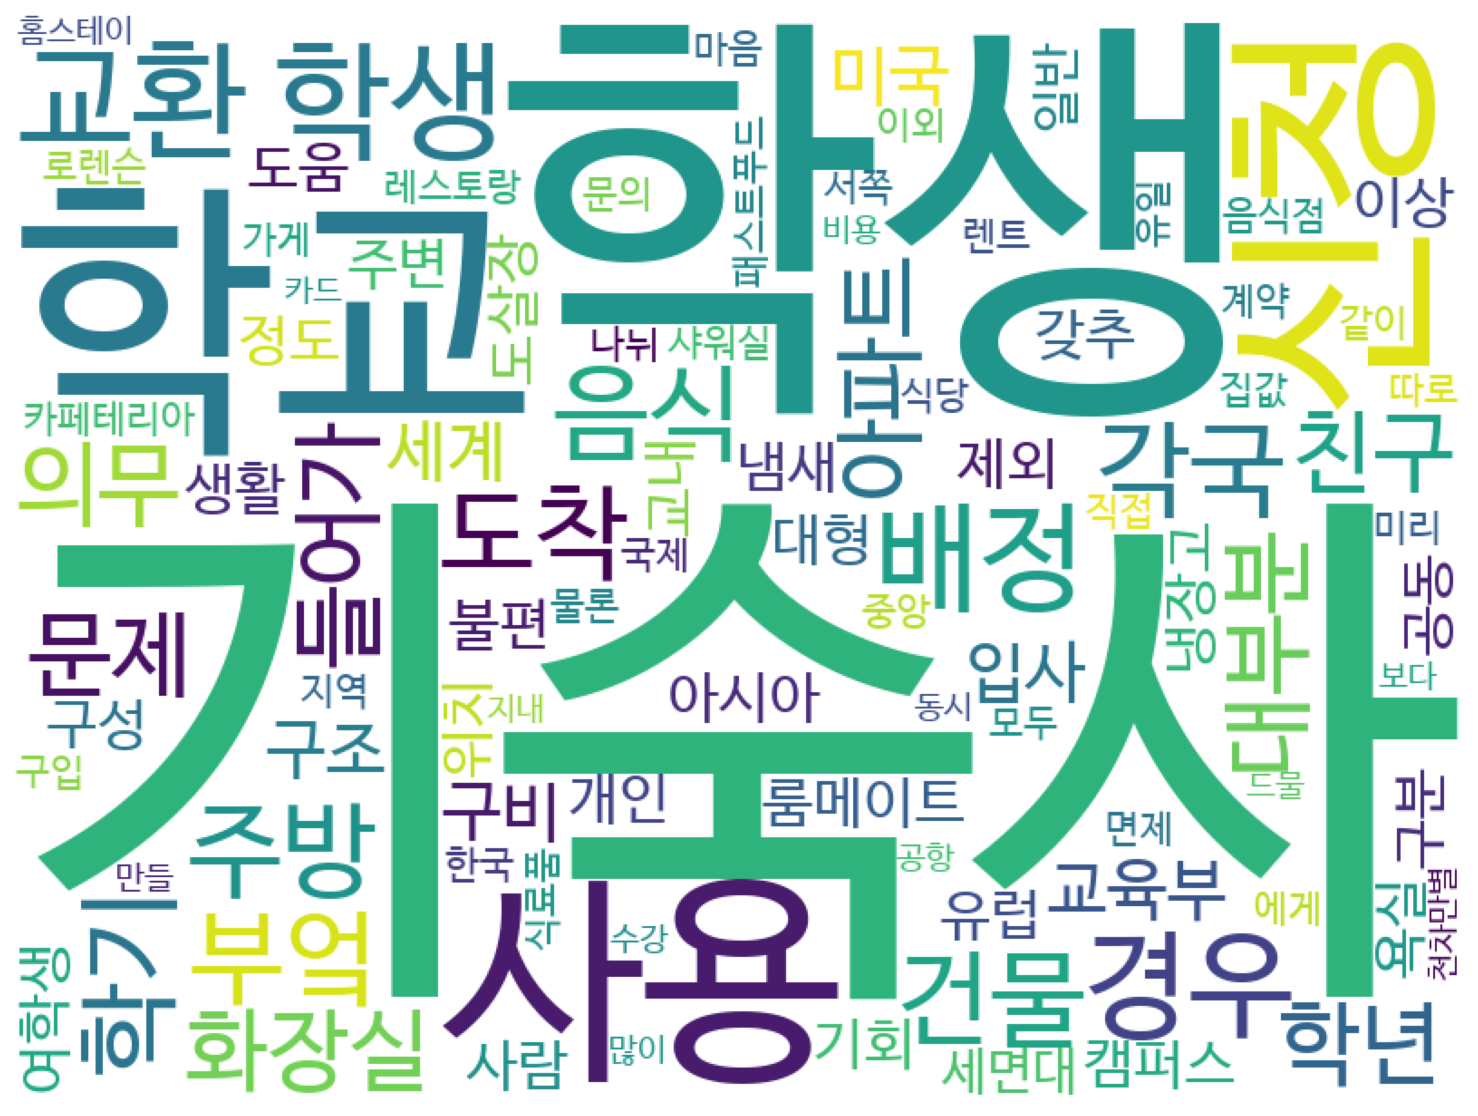

In [47]:
# 빈도수 별로 단어를 크게 표시한다
str_keywords = ' '.join(mecab_keywords)
wordcloud.generate(str_keywords)
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

## use konlpy okt for tokenizing
### wordcloud generation considering frequency

In [48]:
from konlpy.tag import Okt
okt_tokenizer = Okt()

def okt_kor_tokenizer(raw, stopwords):
    # position arguments(or position tags): 내가 뽑아내고 싶은 형태소들
    twitter_pos = ["Noun", "Alpha", "Verb", "Number", "Adverb"]
    twitter_list = [
        word
        # normalize 그랰ㅋㅋ -> 그래ㅋㅋ  # stemming 바뀌나->바뀌다
        for word, tag in okt_tokenizer.pos(raw, norm=True, stem=True)
        if len(word) > 1 and tag in twitter_pos and word not in stopwords
    ]
    return twitter_list

# combine extracted noun and verb list without overlapping

In [49]:
okt_words = okt_kor_tokenizer(summary, stopwords_list)
okt_words[:10]

['로렌', '살다', '부엌', '해먹', '가다', '구입', '하다', '카페테리아', '음식', '먹다']

In [50]:
# Okt divided nouns list term frequency
okt_words_counted = Counter(okt_words)
print("number of counted words:", len(okt_words_counted))
okt_words_counted.most_common(100)

number of counted words: 252


[('하다', 50),
 ('되어다', 12),
 ('되다', 8),
 ('사용', 6),
 ('먹다', 5),
 ('않다', 5),
 ('배정', 5),
 ('신청', 5),
 ('받다', 5),
 ('부엌', 4),
 ('음식', 4),
 ('들다', 4),
 ('도착', 4),
 ('각국', 4),
 ('주방', 4),
 ('건물', 4),
 ('아파트', 3),
 ('의무', 3),
 ('들어가다', 3),
 ('크다', 3),
 ('화장실', 3),
 ('학년', 3),
 ('친구', 3),
 ('교육부', 3),
 ('이다', 3),
 ('입사', 3),
 ('구비', 3),
 ('구조', 3),
 ('살다', 2),
 ('해먹', 2),
 ('가다', 2),
 ('주변', 2),
 ('아시아', 2),
 ('룸메이트', 2),
 ('나뉘다', 2),
 ('공동', 2),
 ('욕실', 2),
 ('딸리다', 2),
 ('캠퍼스', 2),
 ('들이다', 2),
 ('제외', 2),
 ('구성', 2),
 ('편이', 2),
 ('전세계', 2),
 ('두다', 2),
 ('기회', 2),
 ('오다', 2),
 ('때문', 2),
 ('여학생', 2),
 ('갖추다', 2),
 ('대형', 2),
 ('냉장고', 2),
 ('또는', 2),
 ('구분', 2),
 ('냄새', 2),
 ('도살', 2),
 ('위치', 2),
 ('교내', 2),
 ('세면대', 2),
 ('일반', 2),
 ('로렌', 1),
 ('구입', 1),
 ('카페테리아', 1),
 ('렌트', 1),
 ('살수', 1),
 ('지역', 1),
 ('집값', 1),
 ('싼편이므', 1),
 ('맞다', 1),
 ('계약', 1),
 ('패스트푸드', 1),
 ('레스토랑', 1),
 ('가게', 1),
 ('한국음식점', 1),
 ('방이', 1),
 ('마음', 1),
 ('문의', 1),
 ('바꾸다', 1),
 ('샤워실', 1),
 ('로서', 1),
 ('면제

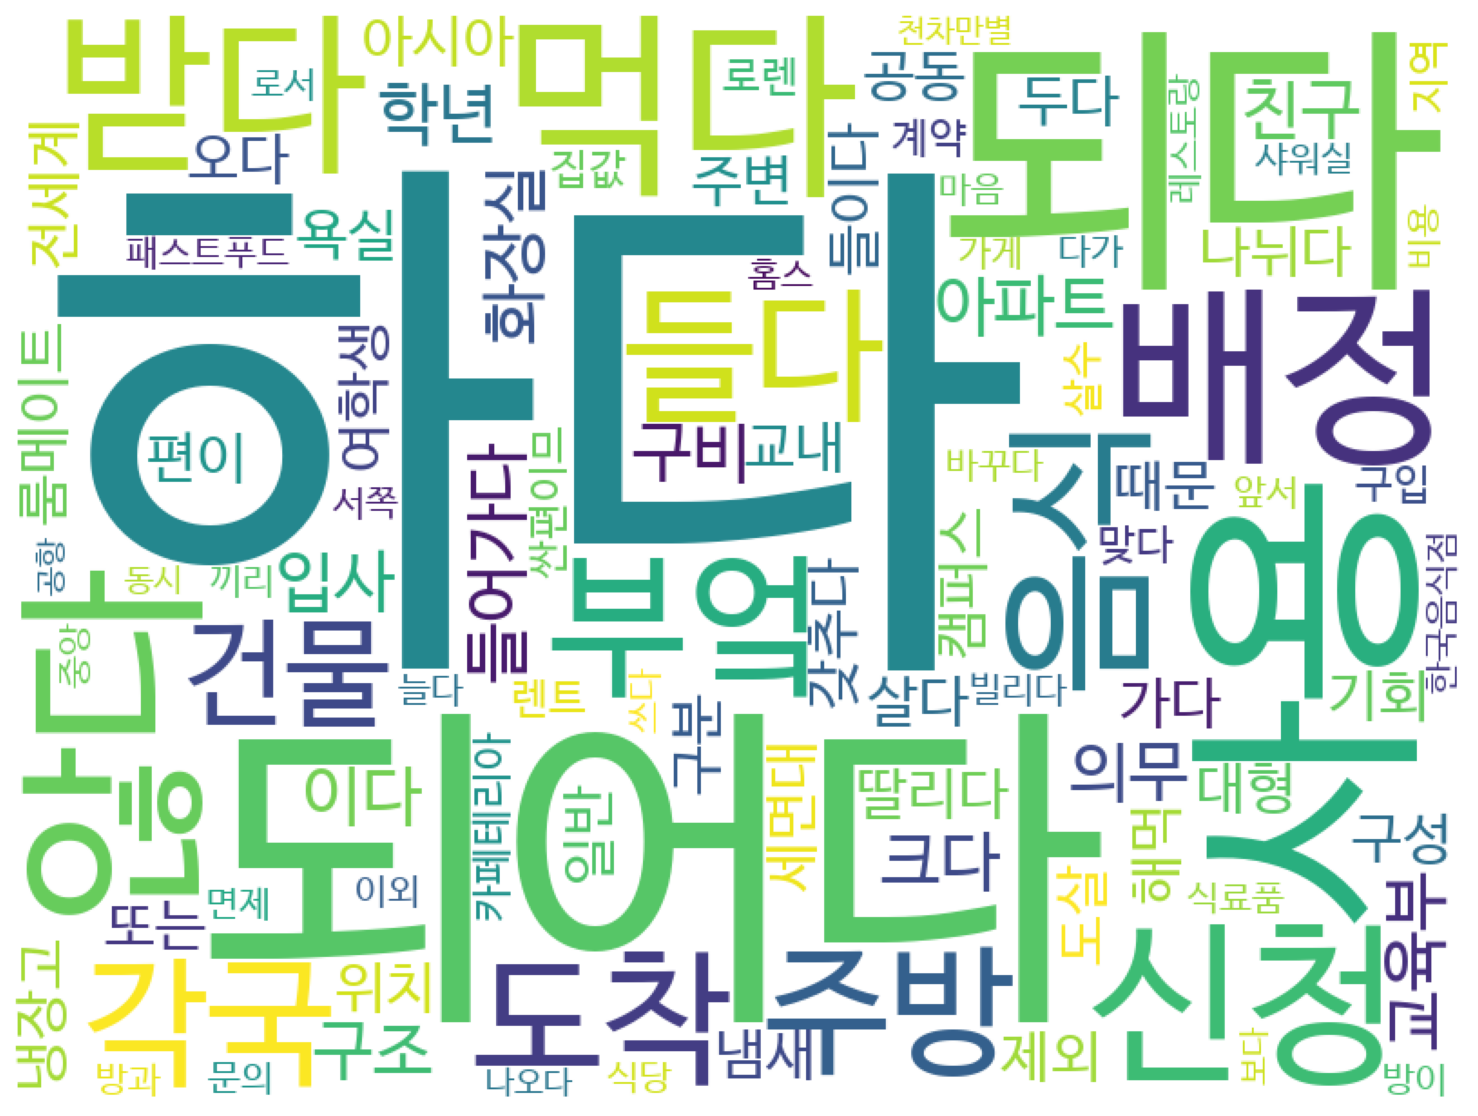

In [51]:
# 빈도수 별로 단어를 크게 표시한다
wordcloud.generate_from_frequencies(frequencies = okt_words_counted) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 